In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.figure_factory as ff
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.ensemble import GradientBoostingClassifier
pio.renderers.default = 'colab'

In [3]:
!pip install artemis

In [4]:
!pip install pyartemis

# Loading Data and **Preprocessing**

In [5]:
data = load_breast_cancer()

In [6]:
print(f"Dataset shape: {data.data.shape}")
print(f"Target names: {data.target_names}")

Dataset shape: (569, 30)
Target names: ['malignant' 'benign']


In [7]:
feature_names = data.feature_names
target_names = data.target_names
df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [8]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [9]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [10]:
X = df.drop('target', axis=1)
y = df['target']

# **Standardization**

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# **Splitting**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
df.shape

(569, 31)

In [14]:
len(data.feature_names)

30

In [15]:
y.value_counts(normalize=True)

,target
1,0.627417
0,0.372583


In [16]:
X_train.shape

(455, 30)

In [17]:
X_test.shape

(114, 30)

In [18]:
df.duplicated().sum()

0

In [19]:
features = df.drop('target', axis=1)

In [20]:
selected_features=['mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [21]:
X_df = pd.DataFrame(X, columns=data.feature_names)

In [22]:
X_train_df =  pd.DataFrame(X_train, columns=data.feature_names)

# **GradiendBoosting**

In [23]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
gb_pred=gb.predict(X_test)

In [25]:
accuracy_score(y_test, gb_pred)

0.956140350877193

In [26]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# **Confusion Matrix**

In [27]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, gb_pred)
print(conf_matrix)

Confusion Matrix:
[[38  4]
 [ 1 71]]


In [28]:
labels = ['Benign', 'Malignant']
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale='Viridis',
    showscale=True,
    annotation_text=[[str(value) for value in row] for row in conf_matrix]
)
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted Label",
    yaxis_title="True Label",
    width=600,
    height=600
)
fig.show()

- The confusion matrix shows a classification model with 38 true benign predictions and 71 true malignant predictions, with 1 false benign and 4 false malignant cases, indicating high accuracy for malignant predictions but some missclassification for benign cases.

# Learning **Curve**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_wei

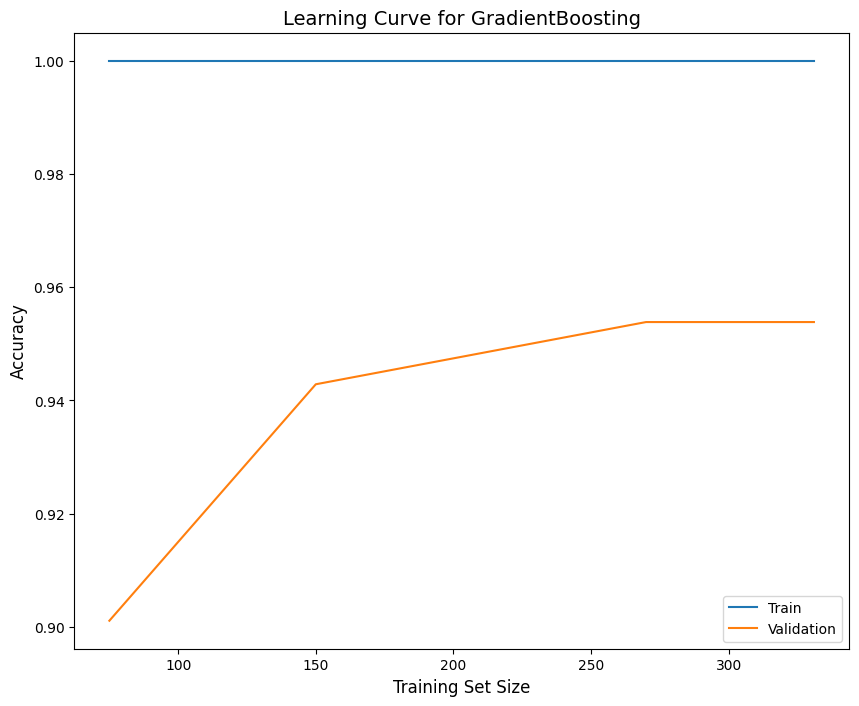

In [29]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




train_sizes = [1, 75, 150, 270, 331]


train_sizes, train_scores, test_scores = learning_curve(
    estimator=gb,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=train_sizes
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")


plt.title("Learning Curve for GradientBoosting", fontsize=14)
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc="best")

plt.show()

##The GradientBoosting learning curve has the training accuracy  at 1.0, and the validation accuracy rising from 0.90 to around 0.96 and plateus, showing good generalization with minimal underfitting as the validation accuracy has not reached the training accuracy.

# Validation **curve**

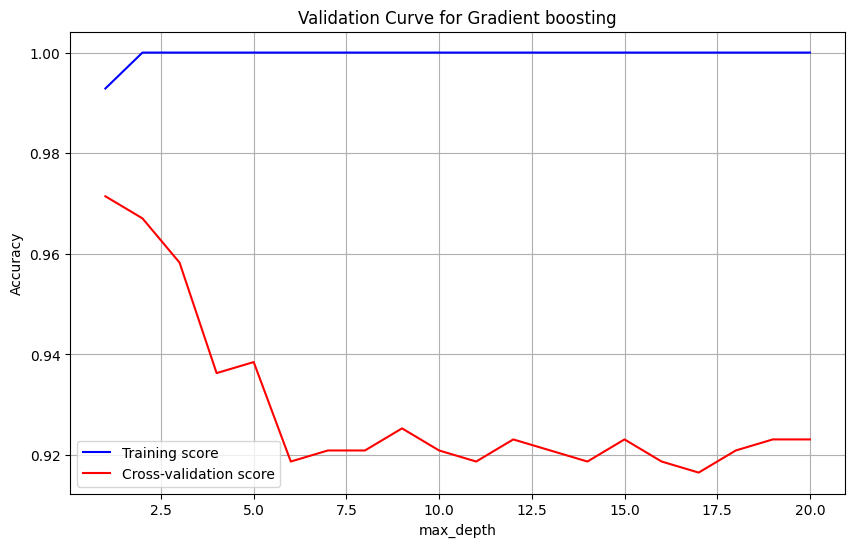

In [30]:
from sklearn.model_selection import validation_curve



def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=5, scoring="accuracy"):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
        scoring=scoring
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, label="Training score", color="blue")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()



param_range = np.arange(1, 21)
plot_validation_curve(
    gb,
    "Validation Curve for Gradient boosting",
    X_train_scaled,
    y_train,
    "max_depth",
    param_range,
    cv=5,
    scoring="accuracy"
)

## Gradient Boosting validation curve shows that the training score  is constant at 1.0, but the cross-validation score drops from 0.98 to 0.92 with increasing max_depth, which indicates overfitting as tree depth increases.

# Precision-Recall **Curve**

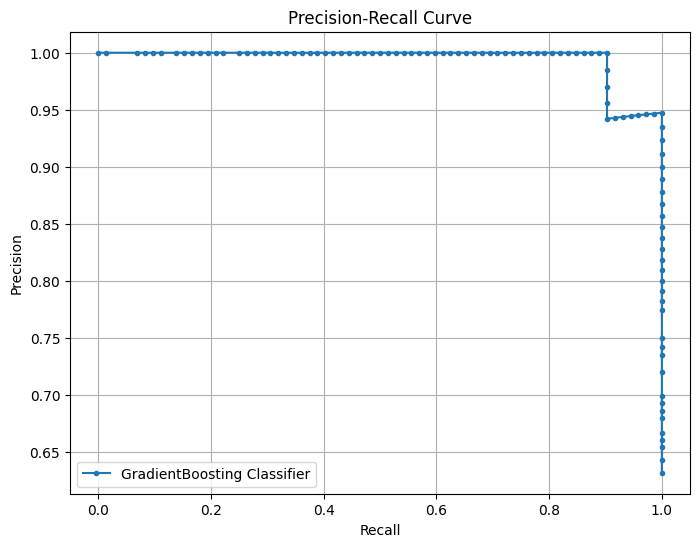

In [31]:
from sklearn.metrics import precision_recall_curve
y_probs_gb = gb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_gb)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label="GradientBoosting Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

##The precision-recall curve for GradientBoosting Classifier shows high precision around 1.0 up to around a recall of around 0.95, followed by a sharp decrease, showing extremely good performance on most positive predictions

# ROC **Curve**

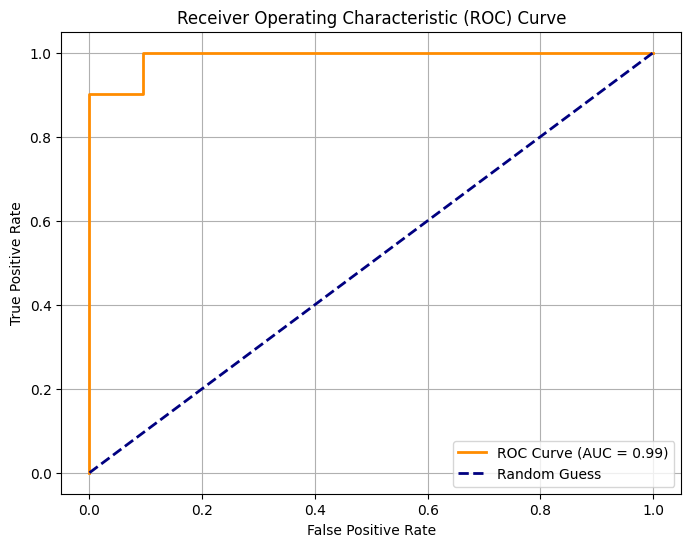

In [32]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs_gb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

##The ROC curve of the GradientBoosting shows a very high Area Under the Curve  of 0.99 with very good performance and a practically perfect True Positive Rate and very low False Positive Rate in comparison to random guess

# **ELI5**

In [33]:
!pip install eli5

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

In [35]:
print("\nELI5 Explanation for GradientBoosting:")
display(eli5.show_weights(gb, feature_names=X.columns.tolist()))


ELI5 Explanation for GradientBoosting:


Weight,Feature
0.4353 ± 0.5079,worst radius
0.2721 ± 0.4563,worst perimeter
0.1063 ± 0.2072,worst concave points
0.0525 ± 0.2697,worst texture
0.0315 ± 0.2218,mean concave points
0.0270 ± 0.0701,texture error
0.0205 ± 0.3182,worst area
0.0108 ± 0.1572,worst smoothness
0.0105 ± 0.0724,worst concavity
0.0055 ± 0.1751,area error


##The ELI5 Explanation for GradientBoosting shows worst_radius feature as the most important feature, meaning it has the biggest impact on the model's predictions

In [36]:
print("\nELI5 Explanation for GradientBossting with Permutation Importance :")
perm = PermutationImportance(gb, random_state=42).fit(X_test, y_test)
display(eli5.show_weights(perm, feature_names=X.columns.tolist()))


ELI5 Explanation for GradientBossting with Permutation Importance :


Weight,Feature
0.0491 ± 0.0238,worst concave points
0.0123 ± 0.0263,worst texture
0.0105 ± 0.0172,mean texture
0.0105 ± 0.0070,worst smoothness
0.0105 ± 0.0205,worst area
0.0070 ± 0.0233,area error
0.0053 ± 0.0086,mean area
0.0053 ± 0.0140,worst radius
0.0018 ± 0.0070,smoothness error
0.0018 ± 0.0070,radius error


##The ELI5 Explanation for GradientBoosting with Permutation Importance indicates worst_concave_points feature as the most important feature for predictions in the model, followed by mean_texture feature, while features like radius_error and mean_smoothness have no effect.

In [37]:
eli5.show_prediction(gb, X_test.iloc[1], horizontal_layout=False, show_feature_values=True)

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:489: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:489: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:489: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:489: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:489: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:489: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local

##The ELI5 explanation shows a GradientBoosting model predicting a 100% probability (score 8.582) of class y=1, with worst_concave_points feature and smoothness_error feature  as top positive contributors

# **PDP**

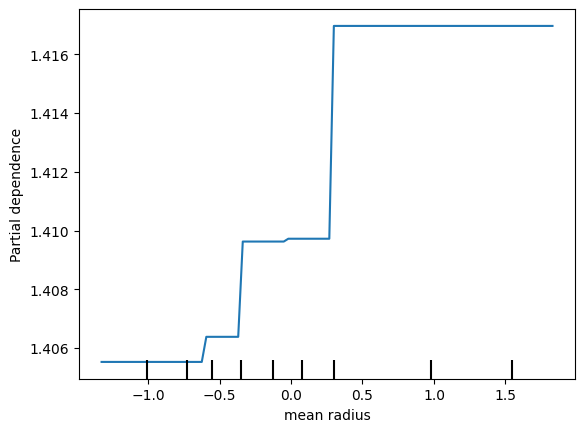

In [38]:
from sklearn.inspection import PartialDependenceDisplay

feature = [0]

target_class = 0

PartialDependenceDisplay.from_estimator(gb, X_test, features=feature, target=target_class)
plt.show()

##The partial dependence plot shows that the model's prediction sharply increases from 1.406 to 1.416 as mean_radius goes up from around -0.5 to 0.5, which indicates a very strong positive correlation between mean radius and the predicted value

# **ICE**

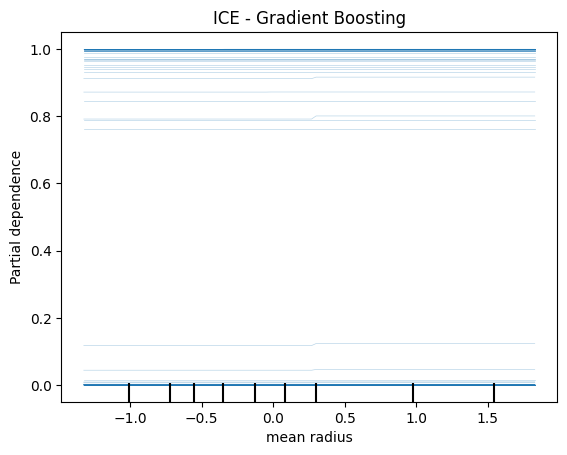

In [39]:
PartialDependenceDisplay.from_estimator(gb, X_test, features=feature, target=target_class, kind='individual')
plt.title("ICE - Gradient Boosting")
plt.show()

##The ICE plot of Gradient Boosting shows that single predictions mostly are flat at 0.0 or 1.0 partial dependence along the range of mean_radius, indicating stable prediction behavior with low variability for most of the instances.

# **ALE**

In [40]:
!pip install alibi

In [41]:
from alibi.explainers import ALE, plot_ale

In [42]:
proba_fun_gb = gb.predict_proba

In [43]:
proba_ale_gb = ALE(proba_fun_gb, feature_names=feature_names, target_names=target_names)

In [44]:
proba_exp_gb = proba_ale_gb.explain(X_train.values)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:1576: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:1576: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:1576: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:1576: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:1576: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:1576: UserWarning:

X

array([[<Axes: xlabel='mean smoothness', ylabel='ALE'>,
        <Axes: xlabel='mean compactness', ylabel='ALE'>,
        <Axes: xlabel='mean concavity', ylabel='ALE'>,
        <Axes: xlabel='mean concave points', ylabel='ALE'>,
        <Axes: xlabel='mean symmetry', ylabel='ALE'>],
       [<Axes: xlabel='mean fractal dimension', ylabel='ALE'>,
        <Axes: xlabel='radius error', ylabel='ALE'>,
        <Axes: xlabel='perimeter error', ylabel='ALE'>,
        <Axes: xlabel='area error', ylabel='ALE'>,
        <Axes: xlabel='smoothness error', ylabel='ALE'>],
       [<Axes: xlabel='compactness error', ylabel='ALE'>,
        <Axes: xlabel='concavity error', ylabel='ALE'>,
        <Axes: xlabel='concave points error', ylabel='ALE'>,
        <Axes: xlabel='symmetry error', ylabel='ALE'>,
        <Axes: xlabel='fractal dimension error', ylabel='ALE'>],
       [<Axes: xlabel='worst radius', ylabel='ALE'>,
        <Axes: xlabel='worst texture', ylabel='ALE'>,
        <Axes: xlabel='worst perim

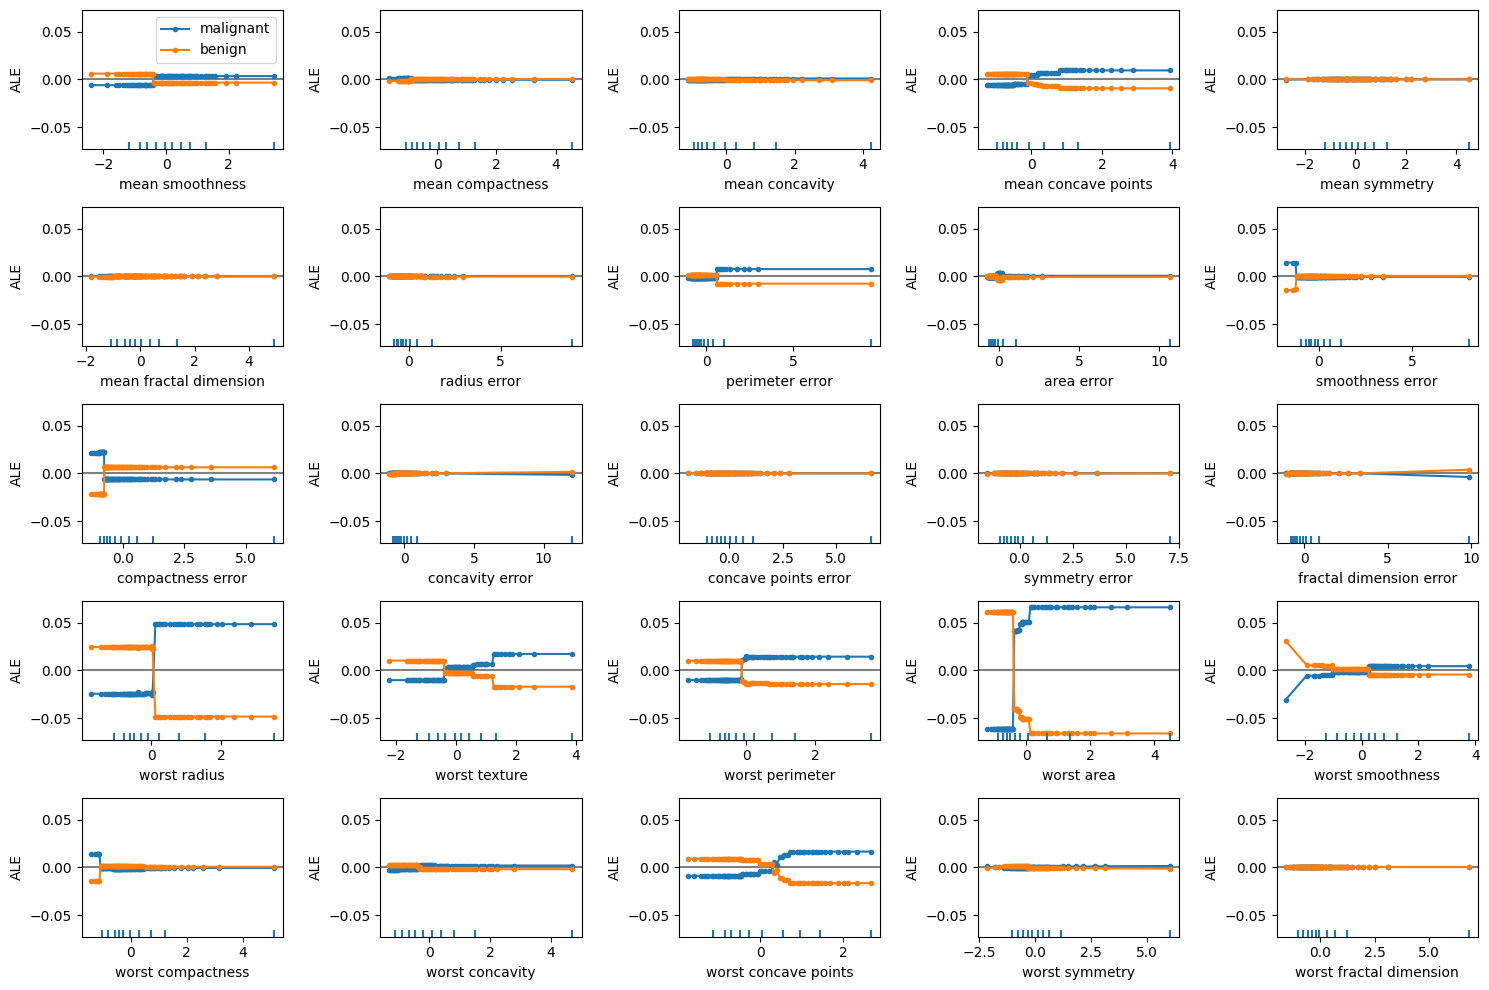

In [45]:
plot_ale(proba_exp_gb, features=selected_features, n_cols=5, fig_kw={'figwidth': 15, 'figheight': 10})

##ALE plots show how features affect GradientBoosting predictions, where worst_area and worst_radius have the largest effects, while features like radius_error and symmetry_error do not have an effect

# Permutation Feature **Importance**

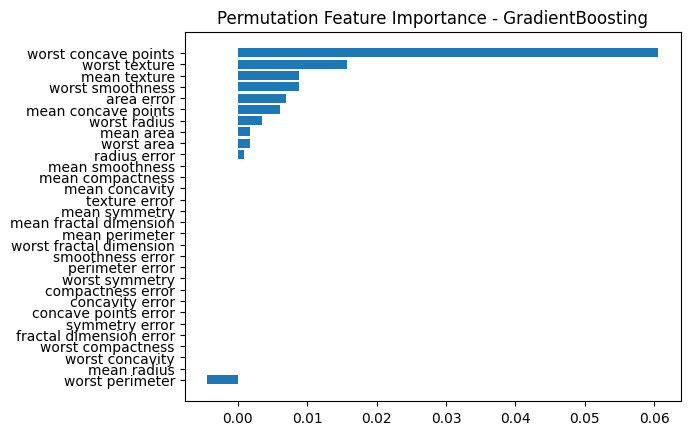

In [46]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gb, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(X_df.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance - GradientBoosting")
plt.show()

##The Permutation Feature Importance for GradientBoosting determines worst_concave_points as the most important feature,followed by worst_texture and mean_texture, while feature like "worst_perimeter" have minimal contribution.

# **LOFO**

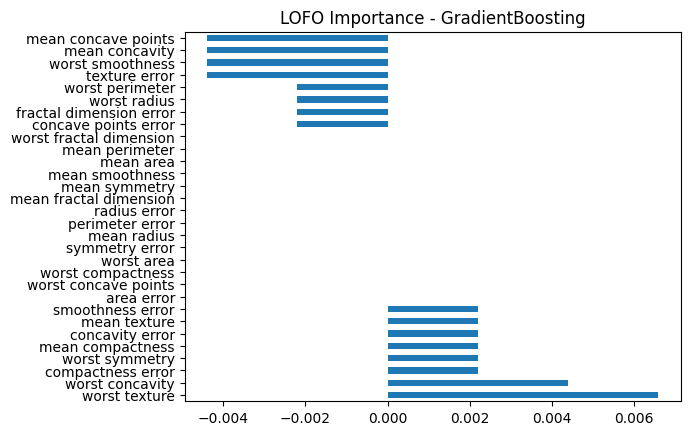

In [47]:
from sklearn.model_selection import cross_val_score

baseline = cross_val_score(gb, X_train, y_train, cv=5).mean()

lofo_scores = {}
for col in X_df.columns:
    X_lofo = X_train_df.drop(columns=[col])
    score = cross_val_score(gb, X_lofo, y_train, cv=5).mean()
    lofo_scores[col] = baseline - score

lofo_df = pd.Series(lofo_scores).sort_values(ascending=False)
lofo_df.plot(kind='barh')
plt.title("LOFO Importance - GradientBoosting")
plt.show()

##The LOF0 Importance for GradientBoosting shows worst_texture as the most important feature, followed by worst_concavity,while features like mean_concave_points and mean_concavity have a negative importance

# **Global Surrogate**

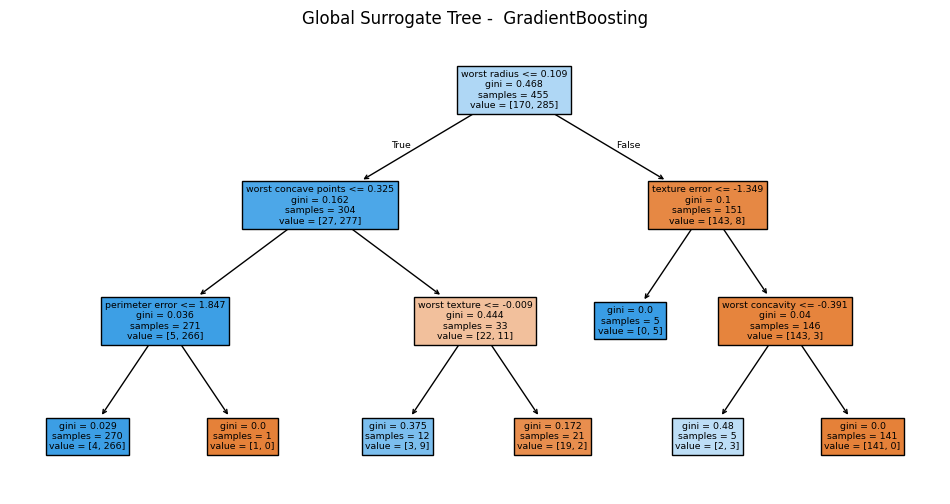

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

surrogate = DecisionTreeClassifier(max_depth=3)
gb_preds = gb.predict(X_train)
surrogate.fit(X_train, gb_preds)

from sklearn import tree
plt.figure(figsize=(12,6))
tree.plot_tree(surrogate, feature_names=X_df.columns, filled=True)
plt.title("Global Surrogate Tree -  GradientBoosting")
plt.show()

##Global Surrogate Tree of GradientBoosting splits primarily based on worst_radius (≤ 0.109), worst_concave_points (≤ 0.325), and texture_error (≤ -1.349), achieving high purity at the leaves gini = 0.0

# **H-statistic**

In [49]:
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
import random

In [50]:
random.seed(8)

X_exp = random.choices(X_train.values.tolist(), k=100)
X_exp_df = pd.DataFrame(X_exp, columns=feature_names)


X_exp_scaled = scaler.transform(X_exp_df)


X_exp_scaled_df = pd.DataFrame(X_exp_scaled, columns=feature_names)


h_stat = FriedmanHStatisticMethod()
h_stat.fit(gb, X_exp_scaled_df)

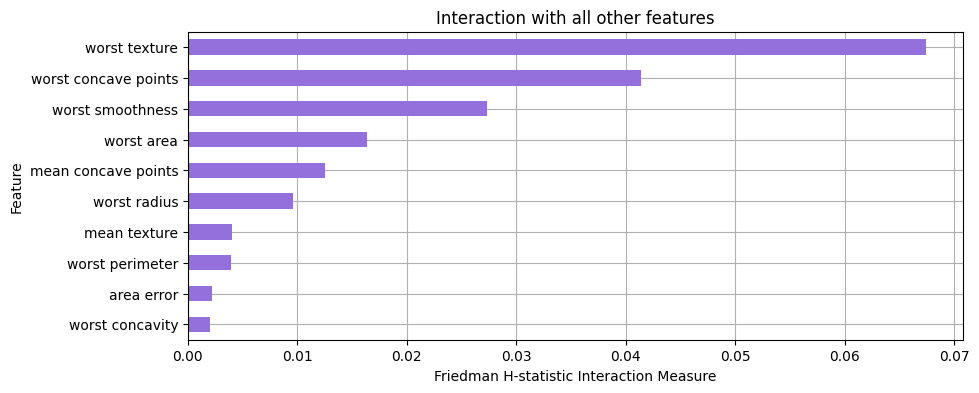

In [51]:
# Overall interaction plot
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart_ova',ax=ax)

##Interaction with the other features chart shows that worst_texture has the highest Friedman H-statistic interaction with the other features in the GradientBoosting model, followed by worst_concave_points and worst_smoothness indicating high feature interactions, while worst_concavity has the lowest interaction

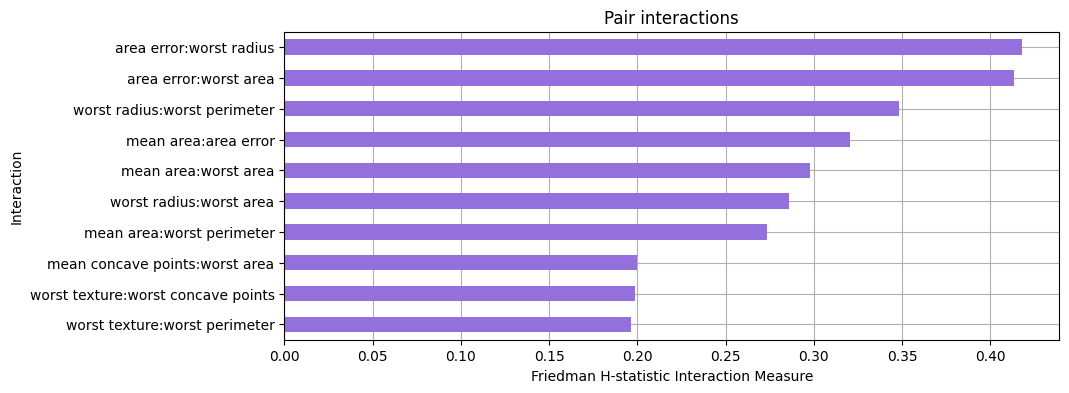

In [52]:
# Pairwise interactions
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot(vis_type='bar_chart',ax=ax)

##Pair interaction chart shows the most significant Friedman H-statistic interaction between worst_radius and area_error and worst_area and area_error, which indicates that these pairs of features significantly impact the predictions of GradientBoosting

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:459: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:459: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



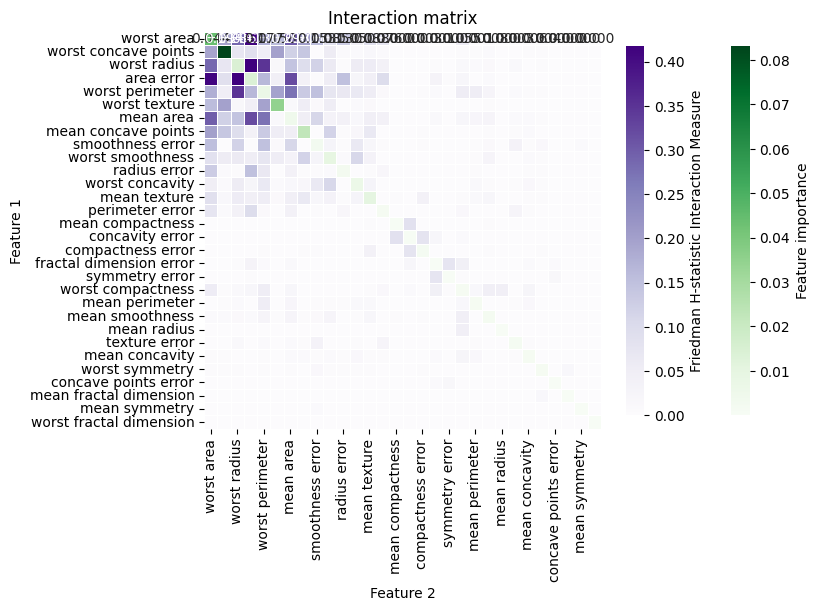

In [53]:
# Interaction heatmap
h_stat.plot()

In [54]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7c45ff6b964456f31107e275b831f54693175397872ccfc705f8df17c1a3b31f
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [55]:
!pip install shap

# **LIME**

In [56]:
import lime
import lime.lime_tabular

In [57]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=feature_names.tolist(),
    class_names=['malignant', 'benign'],
    mode='classification',
    discretize_continuous=True
)

i = 0
exp = explainer.explain_instance(
    data_row=X_test_scaled[i],
    predict_fn=gb.predict_proba,
    num_features=len(feature_names)
)


exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:1576: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



##The LIME model explanation for a GradientBoosting malignant prediction with probability 1.00 indicates the strongest positive contribution from worst_concave_points, with no impacts from features like "mean_concavity  and mean_compactness

# **SHAP**

  0%|          | 0/114 [00:00<?, ?it/s]

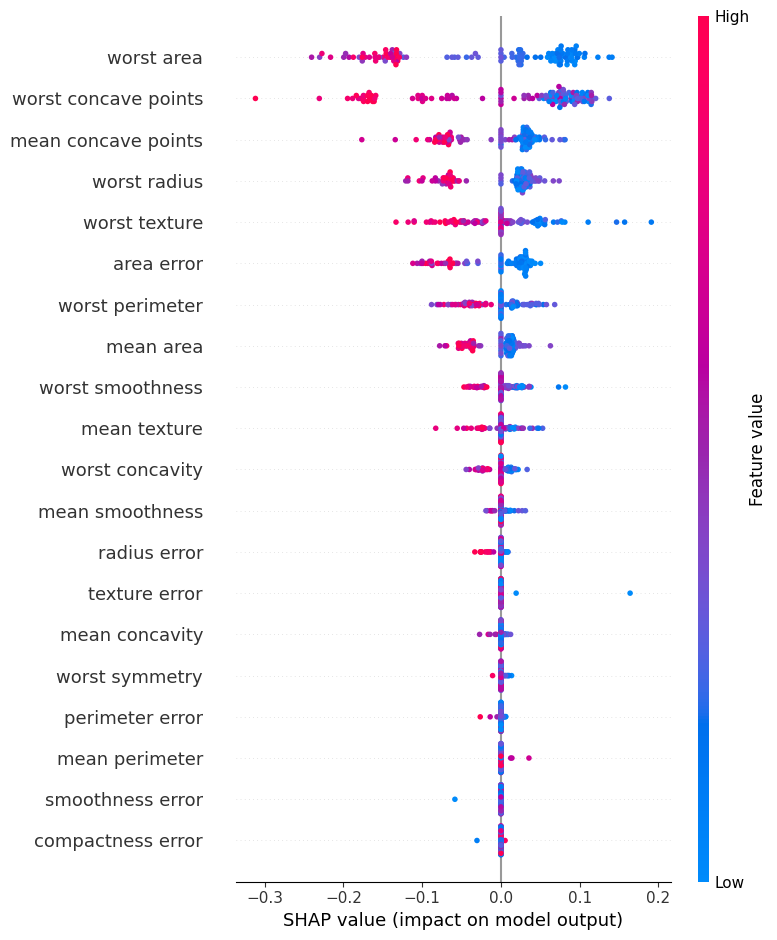

In [58]:
import shap
background_data = shap.sample(X_train_scaled, 100)


explainer = shap.KernelExplainer(gb.predict_proba, background_data)


shap_values = explainer.shap_values(X_test_scaled)


plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test_scaled, feature_names=feature_names, show=True)
plt.show()

##The SHAP plot of the GradientBoosting model shows worst_area and worst_concave_points as the most important features,while features like compactness_error have smallest effect.

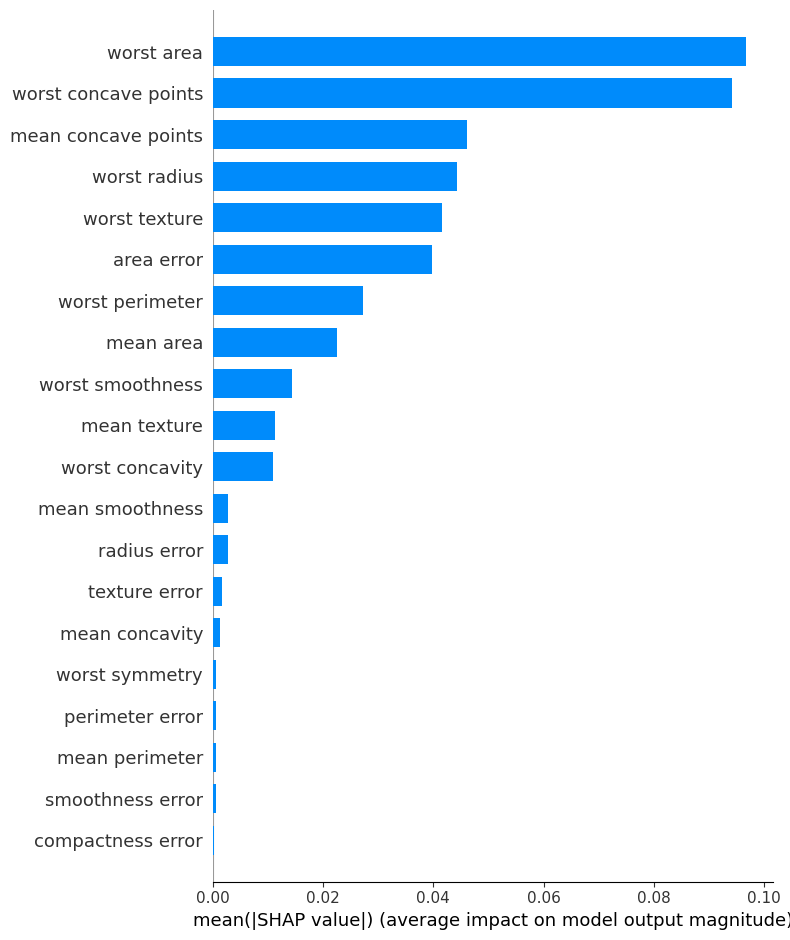

In [59]:
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test_scaled, feature_names=feature_names, plot_type="bar", show=True)
plt.close()

##The GradientBoosting SHAP  bar plot shows worst_area and worst_concave_points as the features with the strongest impact , while features like smoothness_error and compactness_error have the least impact,showing their average contribution to predictions.

In [60]:
explanation = shap.Explanation(
    values=shap_values[:, :, 1],
    base_values=explainer.expected_value[1],
    data=X_test_scaled,
    feature_names=feature_names
)

num_features = len(feature_names)

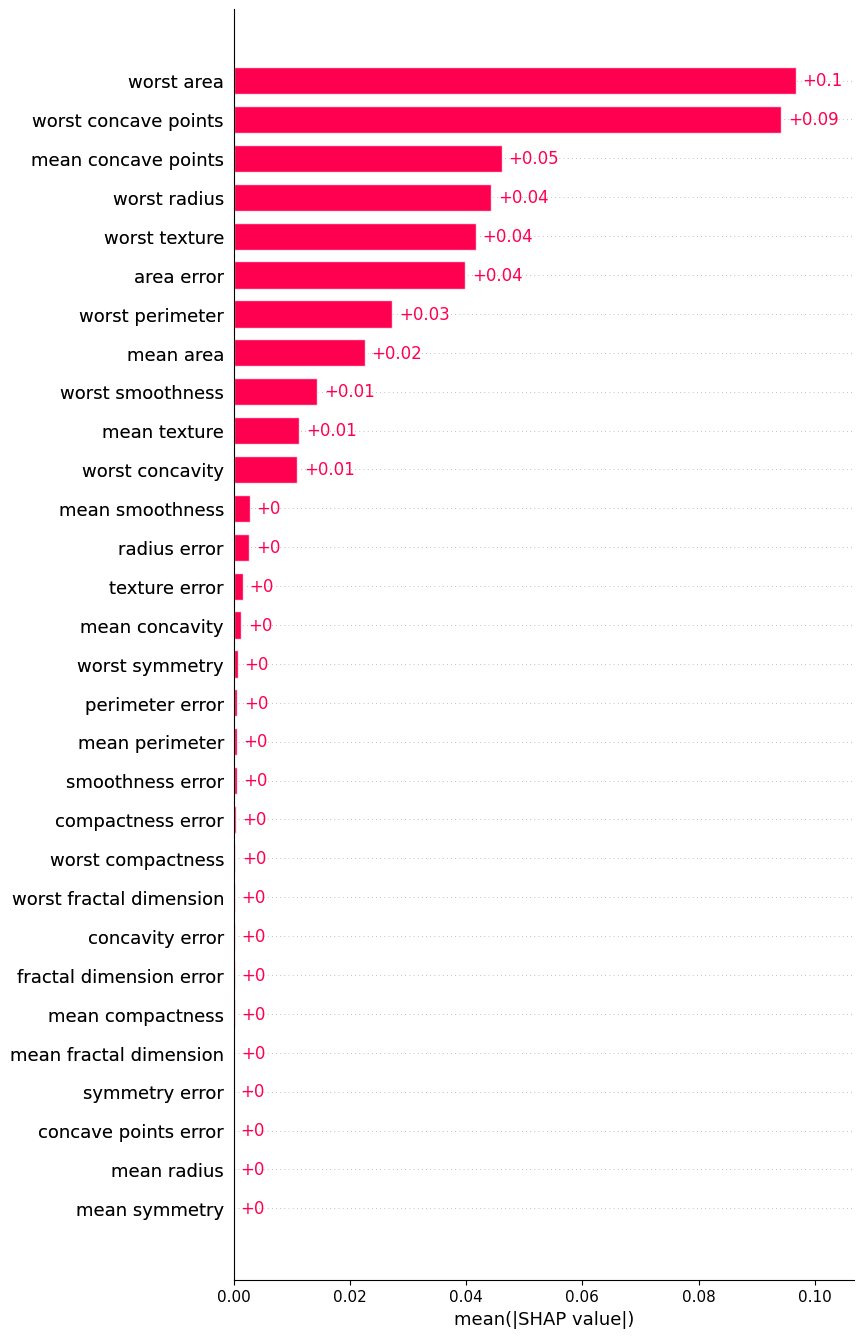

In [61]:
# Bar plot for global feature importance
plt.figure()
shap.plots.bar(explanation, max_display=num_features, show=True)
plt.close()

##The SHAP global feature importance bar plot of  GradientBoosting  shows that worst_area (+0.1) and worst_concave_points (+0.09) are the most important features enhancing the prediction, while mean_radius and mean_symmetry (+0) have no impact.

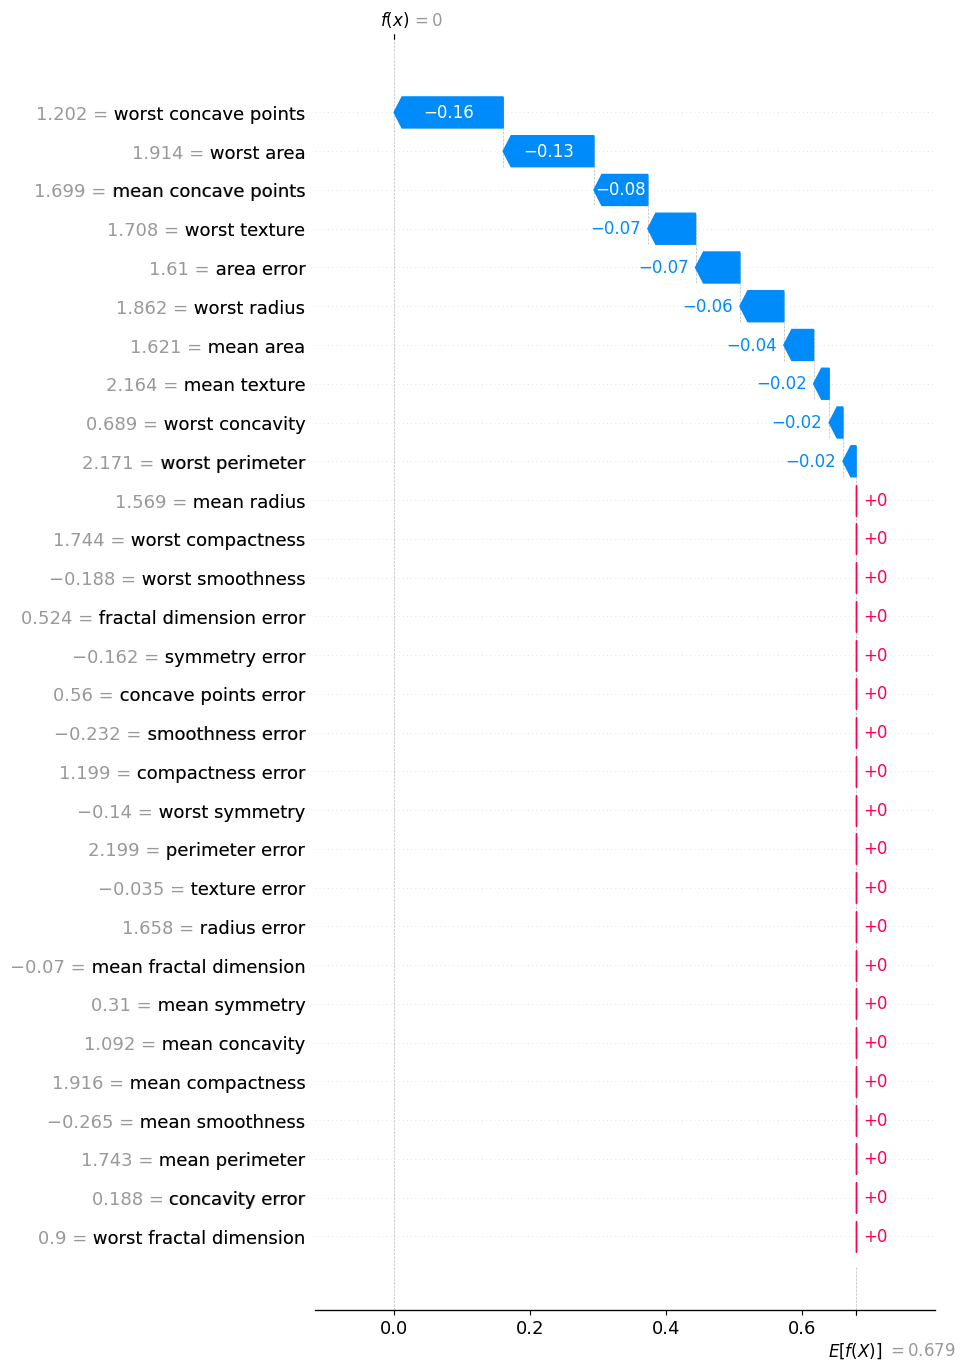

In [62]:
plt.figure()
shap.plots.waterfall(explanation[0], max_display=num_features, show=True)
plt.close()

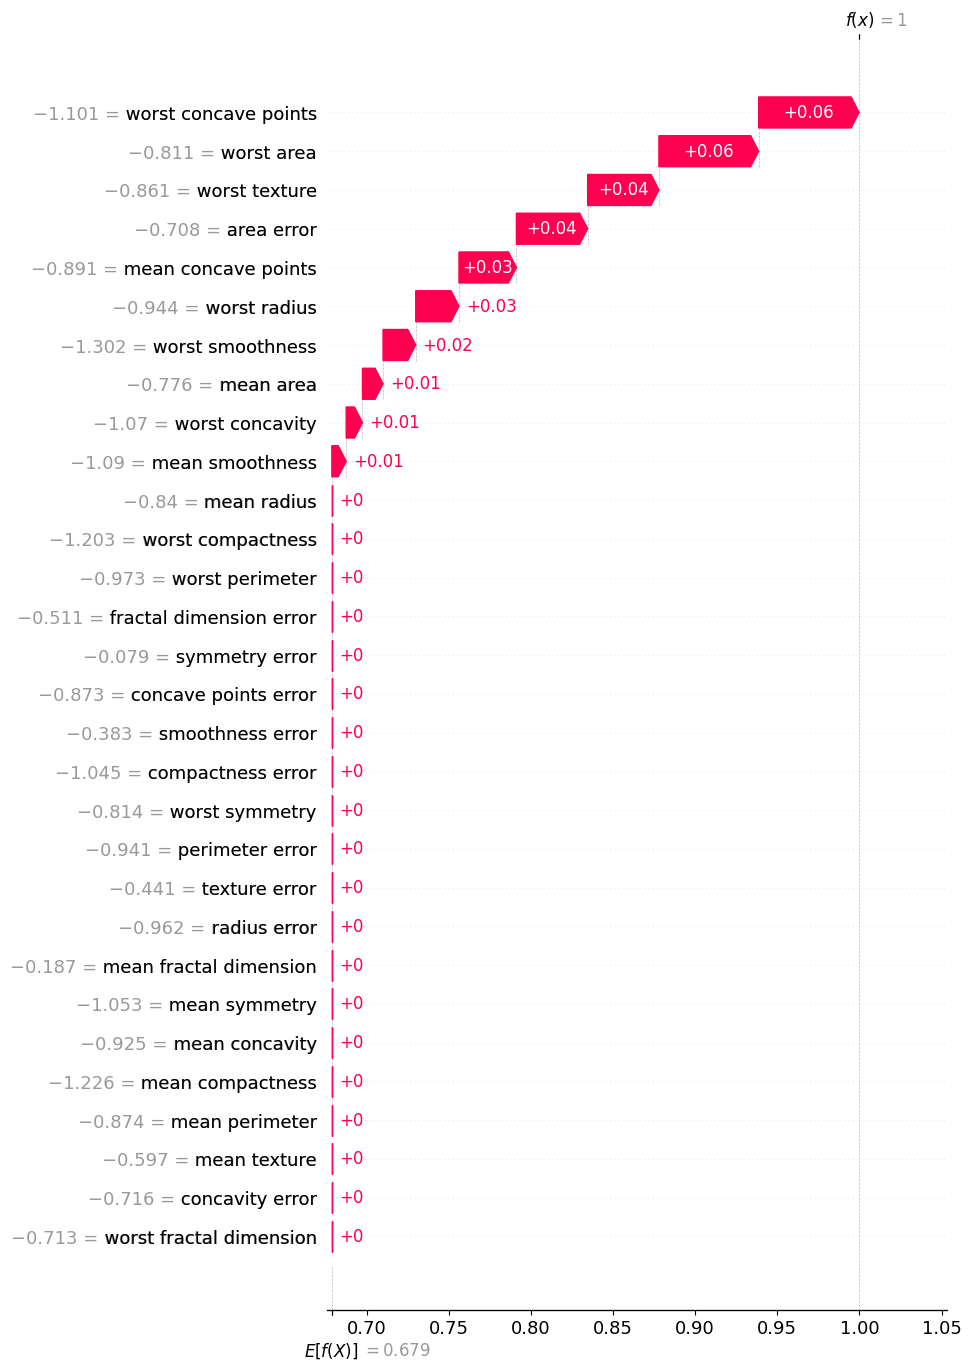

In [63]:
plt.figure()
shap.plots.waterfall(explanation[1], max_display=num_features, show=True)
plt.close()

In [65]:
shap_explainer = shap.Explainer(gb, X_train_scaled)
shap_values = shap_explainer(X_test_scaled)

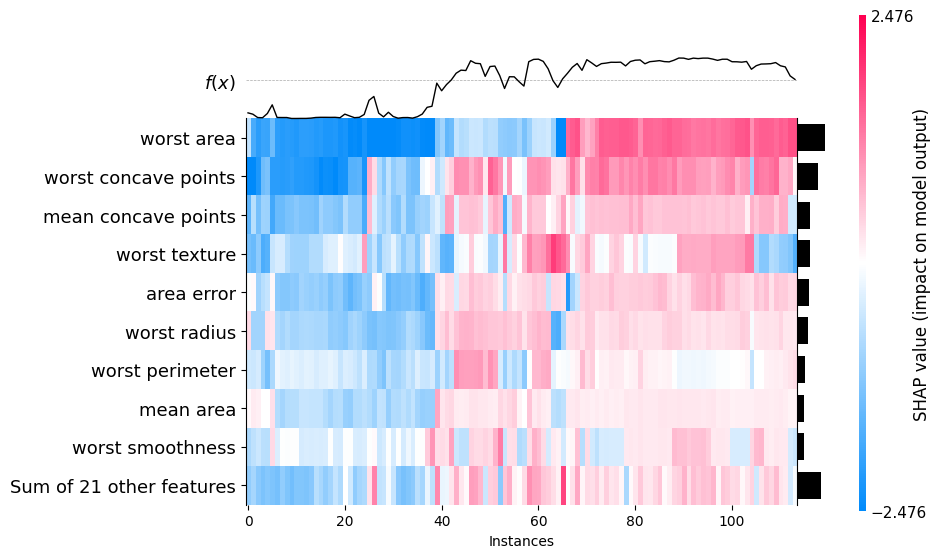

<Axes: xlabel='Instances'>

In [71]:
shap_values1 = shap_values[:, :]

explanation = shap.Explanation(values=shap_values1,
                                 base_values=None,
                                 data=X_test,
                                 feature_names=feature_names)

shap.plots.heatmap(explanation)

##The SHAP heatmap plot for the GradientBoosting model shows worst_area and worst_concave_points as the top contributors  to the model's output over instances, with their effects very different from one another, while the combined contribution of 21 other features is smaller